<a href="https://colab.research.google.com/github/DEBMALYASEN/ABC/blob/master/cam_img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.callbacks import TensorBoard
import time
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
mnist=tf.keras.datasets.mnist
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
Y_train.shape


(60000,)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
Y_test.shape

(10000,)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
Y_train[0]

5

In [ ]:
Y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

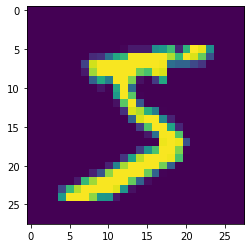

In [ ]:
plt.imshow(X_train[0])

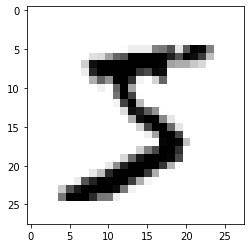

In [ ]:
plt.imshow(X_train[0],cmap=plt.cm.binary)

In [ ]:
X_train=tf.keras.utils.normalize(X_train,axis=1)
X_test=tf.keras.utils.normalize(X_test,axis=1)


In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

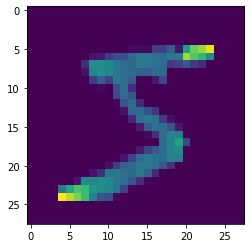

In [ ]:
plt.imshow(X_train[0])


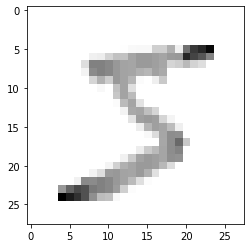

In [ ]:
plt.imshow(X_train[0],cmap=plt.cm.binary)

In [ ]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))#Softmax for prob disb
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,Y_train,epochs=3)


Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2636 - accuracy: 0.9215
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1127 - accuracy: 0.9660
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0766 - accuracy: 0.9762


In [ ]:

k = np.array(X_test)

In [ ]:
k.shape

(10000, 28, 28)

In [ ]:
predictions=model.predict(k)

In [ ]:
predictions[0]

array([3.2743022e-09, 7.5580449e-09, 1.3512966e-05, 3.9672127e-06,
       1.1182654e-10, 2.3059322e-08, 8.6886097e-13, 9.9998260e-01,
       6.3611747e-09, 8.9985415e-09], dtype=float32)

In [ ]:
np.argmax(predictions[0])#just to find max

7

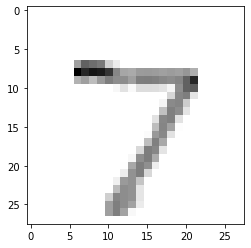

In [ ]:
plt.imshow(X_test[0],cmap=plt.cm.binary)

In [ ]:
val_loss,val_acc=model.evaluate(X_test,Y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0988 - accuracy: 0.9688


In [ ]:
val_loss

0.0987853854894638

In [ ]:
val_acc

0.9688000082969666

In [ ]:

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


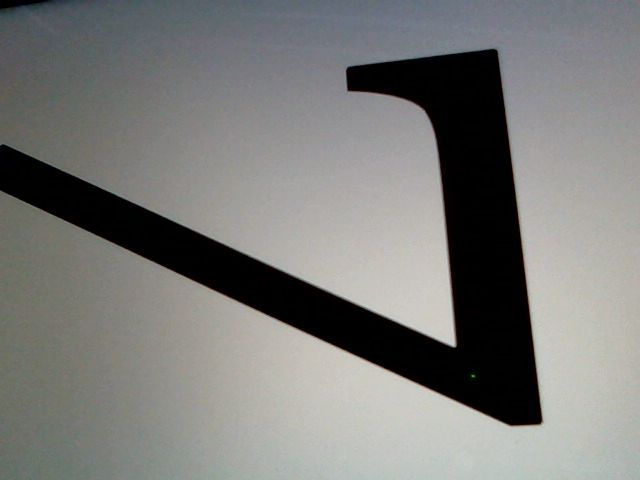

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

307200


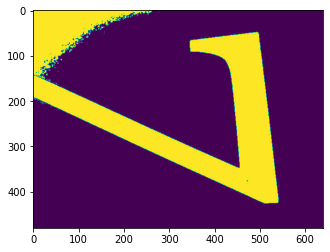

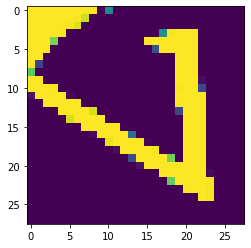

Probability Distribution for 0 0.096883304
Probability Distribution for 1 0.0034811394
Probability Distribution for 2 0.5963766
Probability Distribution for 3 0.0047559007
Probability Distribution for 4 0.14930272
Probability Distribution for 5 0.008425776
Probability Distribution for 6 0.10465523
Probability Distribution for 7 3.818517e-05
Probability Distribution for 8 0.03218777
Probability Distribution for 9 0.003893363
The Predicted Value is 2


In [ ]:
from PIL import Image
user_test = filename
col = Image.open(user_test)
gray = col.convert('L')
bw = gray.point(lambda x: 0 if x<100 else 255, '1')
bw.save("bw_image.jpg")
bw
img_array = cv2.imread("bw_image.jpg", cv2.IMREAD_GRAYSCALE)
img_array = cv2.bitwise_not(img_array)
print(img_array.size)
plt.imshow(img_array)
plt.show()
img_size = 28
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(new_array)
plt.show()
user_test = tf.keras.utils.normalize(new_array, axis = 1)
predicted = model.predict(np.array([[user_test]]))
a = predicted[0][0]
for i in range(0,10):
  b = predicted[0][i]
  print("Probability Distribution for",i,b)

print("The Predicted Value is",np.argmax(predicted[0]))